In [2]:
# test_cuda.py
import torch
import tensorflow as tf

print("=== CUDA Test ===")
print(f"PyTorch CUDA available: {torch.cuda.is_available()}")
print(f"PyTorch CUDA version: {torch.version.cuda}")
print(f"PyTorch cuDNN version: {torch.backends.cudnn.version()}")

if torch.cuda.is_available():
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

print("\n=== TensorFlow Test ===")
print(f"TensorFlow version: {tf.__version__}")
print(f"TensorFlow CUDA support: {tf.test.is_built_with_cuda()}")
print(f"Available GPUs: {len(tf.config.list_physical_devices('GPU'))}")

# Простой тест производительности
if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.randn(1000, 1000).to(device)
    y = torch.mm(x, x.t())
    print(f"GPU computation successful: {y.shape}")

=== CUDA Test ===
PyTorch CUDA available: True
PyTorch CUDA version: 12.1
PyTorch cuDNN version: 8907
GPU Device: NVIDIA GeForce RTX 5070 Ti
GPU Memory: 15.9 GB

=== TensorFlow Test ===
TensorFlow version: 2.19.1
TensorFlow CUDA support: False
Available GPUs: 0
GPU computation successful: torch.Size([1000, 1000])


In [4]:
# 1. Добавляем папку src в системный путь, чтобы Python мог найти наш модуль paths
import sys
from pathlib import Path

# Это нужно сделать ОДИН РАЗ в начале ноутбука
# Находим корень проекта (на два уровня выше текущей директории ноутбука)
# и добавляем папку src в пути для импорта
project_root = Path.cwd().parent 
src_path = project_root / 'src'
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

# 2. Импортируем наши готовые пути
from paths import RAW_DATA_DIR, PROCESSED_DATA_DIR

import pandas as pd

df_part1 = pd.read_parquet(RAW_DATA_DIR / 'stock1.parquet')
df_part2 = pd.read_parquet(RAW_DATA_DIR / 'stock2.parquet')
df_raw = pd.concat([df_part1, df_part2])
df_raw.head()

,symbol,date,open,high,low,close,adj_close,volume
0,A,1999-11-18,32.546494,35.765381,28.612303,31.473534,26.794756,62546380.0
1,A,1999-11-19,30.713518,30.758226,28.478184,28.880545,24.587240,15234146.0
2,A,1999-11-22,29.551144,31.473534,28.657009,31.473534,26.794756,6577870.0
3,A,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.358868,5975611.0
4,A,1999-11-24,28.701717,29.998213,28.612303,29.372318,25.005905,4843231.0


In [ ]:
df_raw.symbol.nunique()

1500

C:\Users\QAd\AppData\Local\Temp\ipykernel_5160\3717902847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_rand['date'] = pd.to_datetime(df_raw_rand['date'])


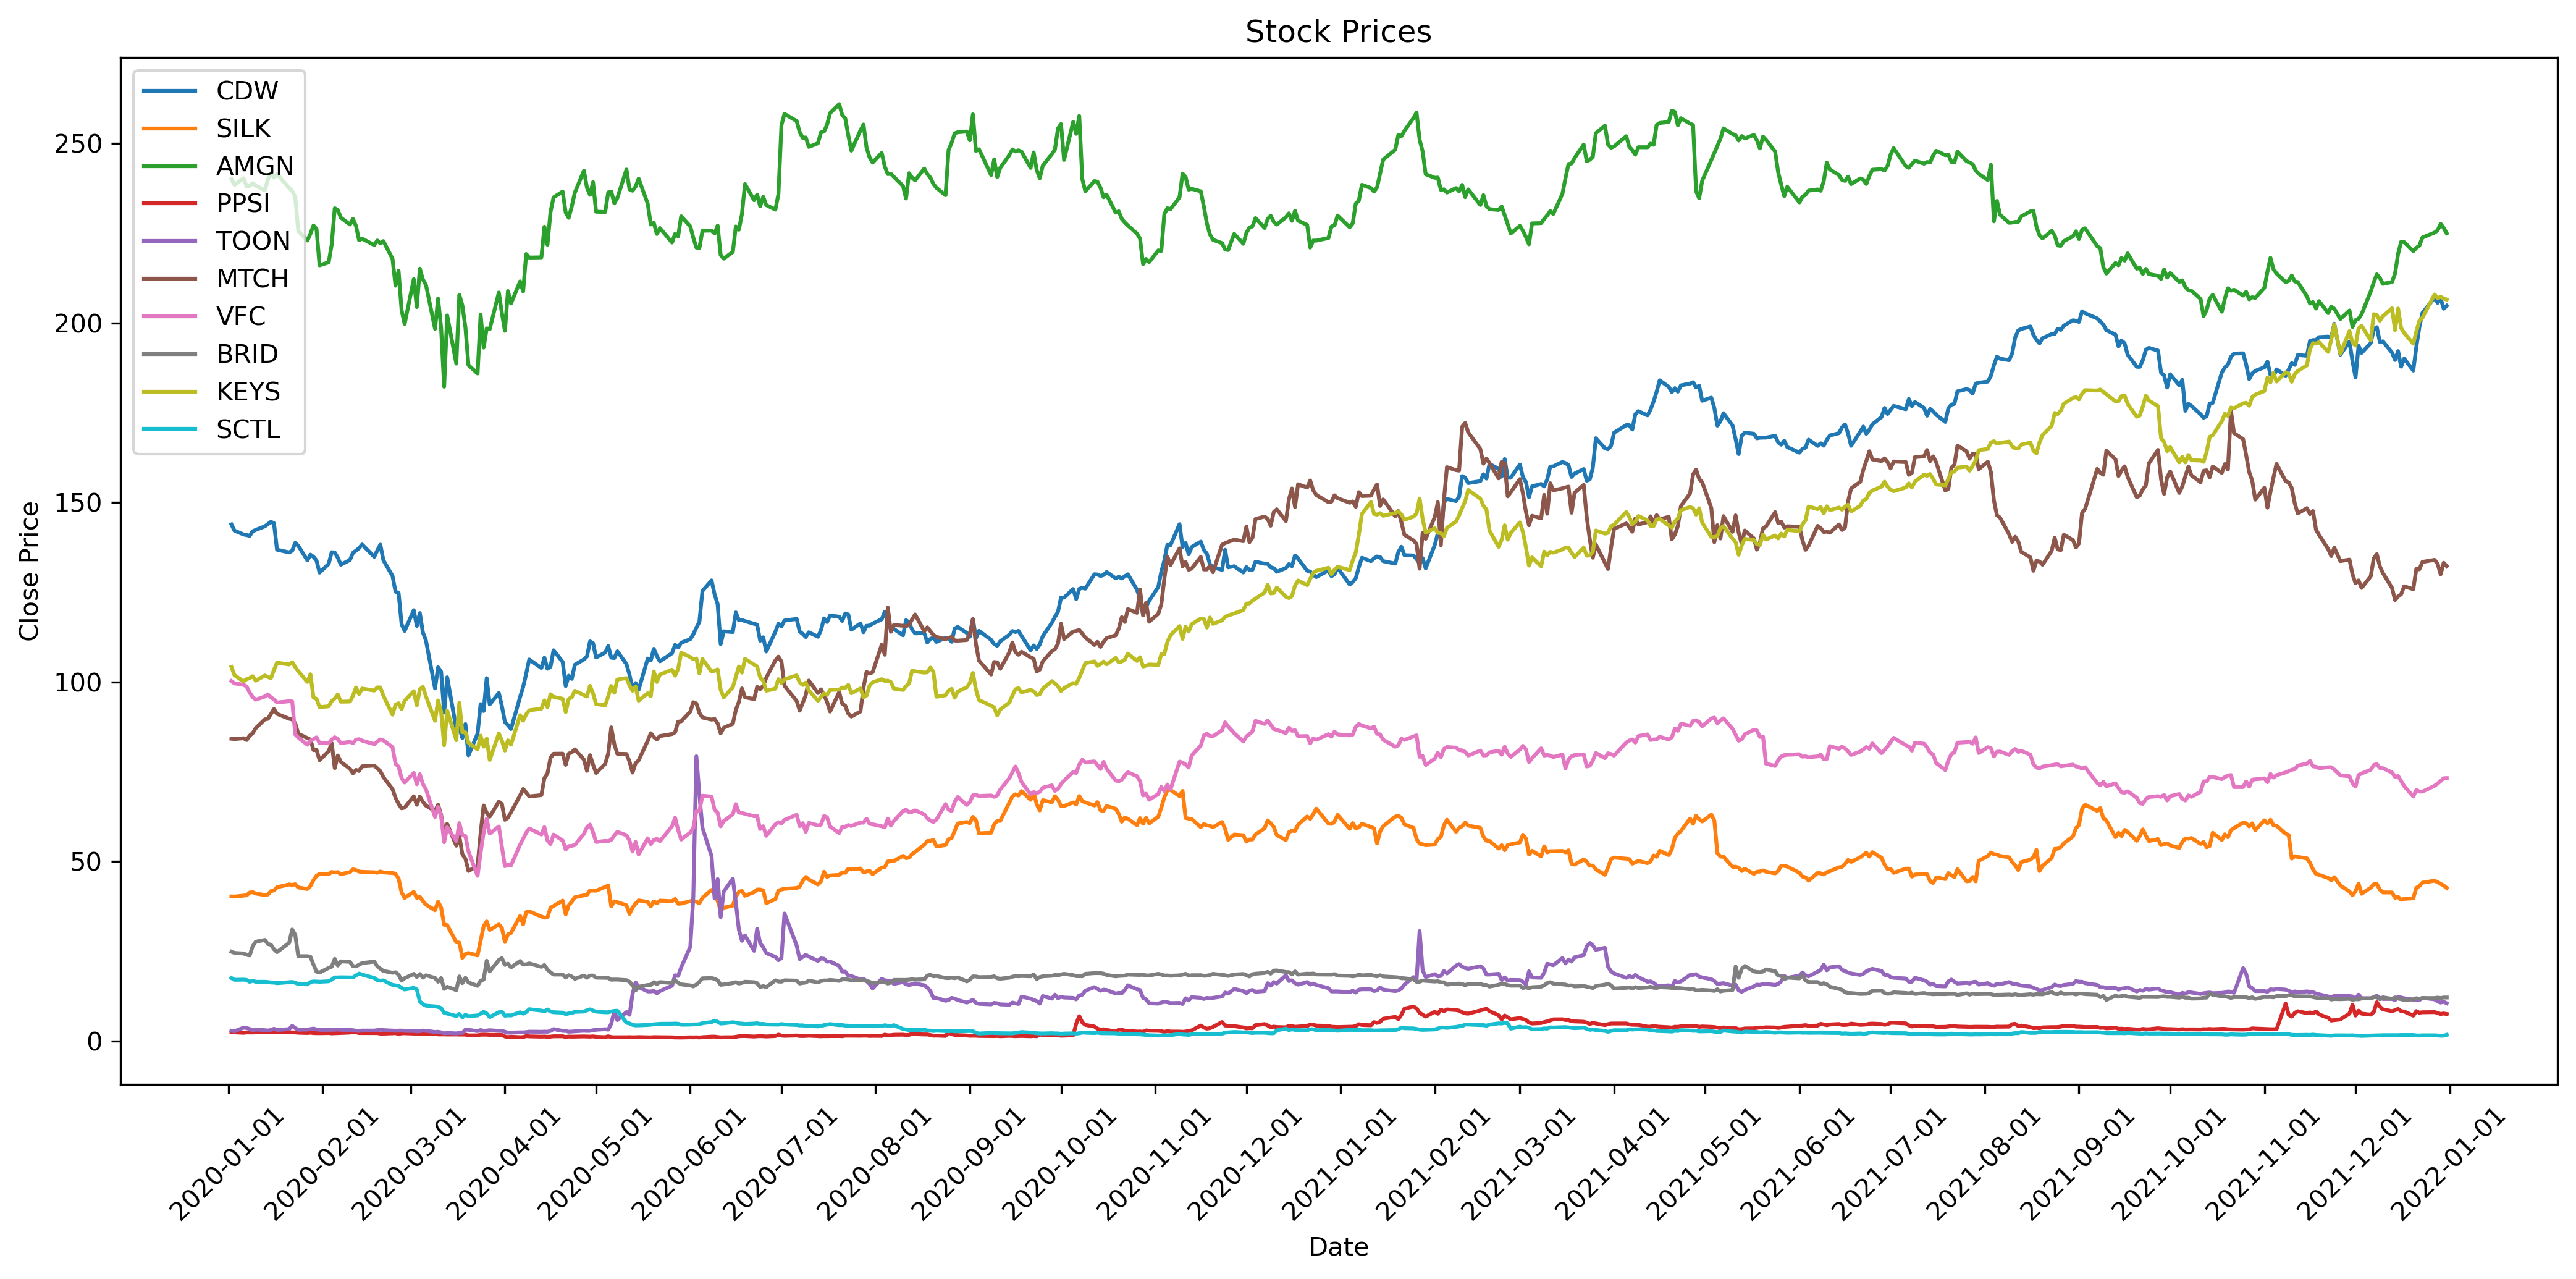

In [59]:
import matplotlib.pyplot as plt
import numpy as np
N_rand = np.random.choice(df_raw.symbol.unique(), size=10, replace=False)
df_raw_rand = df_raw[df_raw.symbol.isin(N_rand)]
df_raw_rand['date'] = pd.to_datetime(df_raw_rand['date'])

plt.figure(figsize=(14, 7), dpi=300)
dates = ['2020-01-01', '2022-01-01']
full_dates = pd.date_range(start=dates[0], end=dates[1])
df_raw_rand = df_raw_rand[df_raw_rand.date >= dates[0]]
df_raw_rand = df_raw_rand[df_raw_rand.date <= dates[1]]
for symbol in N_rand:
    df_symbol = df_raw_rand[df_raw_rand.symbol == symbol]
    plt.plot(df_symbol['date'], df_symbol['close'], label=symbol)
plt.legend()
monthly_ticks = [x for x in full_dates if x.day == 1]  # datetime объекты
monthly_labels = [x.strftime('%Y-%m-%d') for x in monthly_ticks]

plt.xticks(ticks=monthly_ticks, labels=monthly_labels, rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices')
plt.tight_layout()
# several times showing last date on plot. fix it!

plt.show()

In [ ]:
# Creating target variables
N_DAYS = 